## Capstone "Battle of the neighborhoods

#### Import necessary libraries here

In [21]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [22]:
import requests
import numpy as np
import pandas as pd

#### Load CSV file downloaded from Dept of Statistics (Singapore)

In [23]:
# Load CSV and convert to DF
census_df = pd.read_csv('GenHouseholdSurvey2015.csv')

#keep only important rows
census_df = census_df[:28]

#### Use Nominatim to lookup Latitude Longitude coordinates for each of 28 districts

In [24]:
# Get lat long info now
census_df.columns = census_df.columns.str.lstrip()
census_df.columns = census_df.columns.str.rstrip()
census_df['District'] = census_df['District'].str.strip()

address = 'Singapore'
geolocator = Nominatim(user_agent="foursquare_agent")

lat_long_list = []
district_list = []
for index, row in census_df[['District']].iterrows():
    location = geolocator.geocode(address + ' ' + row[0])
    latitude = round(location.latitude, 2)
    longitude = round(location.longitude, 2)
    lat_long_list.append({latitude,longitude})
    district_list.append(row[0])


In [25]:
lat_long_df = pd.DataFrame(lat_long_list, columns = {'latitude', 'longitude'})
lat_long_df['District'] = district_list

#### Merge both dataframes together into one (There's some extra characters in the header that is causing the dataframe to display incorrectly. Let us now try to rectify this issue)

In [26]:
census_df = pd.merge(census_df, lat_long_df, on='District')
census_df

,District,Total,No Working Person,"Below $1,000","$1,000 - $1,999","$2,000 - $2,999","$3,000 - $3,999","$4,000 - $4,999","$5,000 - $5,999","$6,000 - $6,999",...,"$10,000 - $10,999","$11,000 - $11,999","$12,000 - $12,999","$13,000 - $13,999","$14,000 - $14,999","$15,000 - $17,499","$17,500 - $19,999","$20,000 & Over",latitude,longitude
0,Ang Mo Kio,62.6,8.7,2.1,5.4,4.4,3.9,4.0,3.8,2.9,...,2.5,1.8,1.6,1.2,1.7,2.2,2.0,6.1,1.37,103.85
1,Bedok,92.2,10.0,2.2,7.2,4.1,5.3,5.3,6.2,5.2,...,2.7,3.0,3.3,2.6,2.0,4.2,3.5,15.1,1.32,103.93
2,Bishan,27.8,2.6,0.5,1.3,1.1,0.9,1.3,1.0,1.1,...,0.9,1.4,1.2,1.2,0.9,1.3,1.8,5.5,1.35,103.85
3,Bukit Batok,44.0,4.6,0.6,2.4,2.4,2.6,2.7,2.1,3.1,...,2.0,1.8,1.7,1.0,1.6,2.1,1.4,5.3,1.35,103.75
4,Bukit Merah,55.2,10.8,2.1,6.1,3.6,2.7,2.7,2.1,2.2,...,1.7,1.4,1.6,1.4,1.7,2.3,1.6,5.4,1.27,103.83
5,Bukit Panjang,41.2,2.3,0.5,1.7,2.2,2.3,2.4,2.4,2.9,...,2.3,1.5,1.8,1.8,1.2,2.2,1.6,4.4,1.38,103.76
6,Bukit Timah,23.9,2.9,0.3,0.7,0.4,0.4,0.2,0.3,0.3,...,0.9,0.4,0.7,0.4,0.5,1.2,1.9,10.6,1.35,103.78
7,Choa Chu Kang,49.3,2.4,0.6,2.0,3.1,2.9,2.8,3.0,2.8,...,2.5,2.3,1.6,2.1,2.0,3.7,2.0,4.3,1.38,103.74
8,Clementi,30.1,3.9,0.8,1.9,1.6,1.6,1.7,1.7,1.7,...,1.1,1.0,0.8,0.7,0.7,1.7,1.1,4.5,1.32,103.77
9,Geylang,37.5,4.9,1.2,2.7,2.8,2.7,2.3,1.9,2.0,...,1.9,1.1,0.7,0.7,1.0,2.0,1.2,3.3,1.32,103.89


#### After investigation, it is determined that the dollar sign is causing issues. we will remove the dollar sign from the column headers

In [27]:
census_df.columns = ['District', 'Total', 'No Working Person', 'Below 1,000', \
       '1,000 - 1,999', '2,000 - 2,999', '3,000 - 3,999', \
       '4,000 - 4,999', '5,000 - 5,999', '6,000 - 6,999', \
       '7,000 - 7,999', '8,000 - 8,999', '9,000 - 9,999', \
       '10,000 - 10,999', '11,000 - 11,999', '12,000 - 12,999', \
       '13,000 - 13,999', '14,000 - 14,999', '15,000 - 17,499', \
       '17,500 - 19,999', '20,000 & Over', 'latitude', 'longitude']
census_df

,District,Total,No Working Person,"Below 1,000","1,000 - 1,999","2,000 - 2,999","3,000 - 3,999","4,000 - 4,999","5,000 - 5,999","6,000 - 6,999",...,"10,000 - 10,999","11,000 - 11,999","12,000 - 12,999","13,000 - 13,999","14,000 - 14,999","15,000 - 17,499","17,500 - 19,999","20,000 & Over",latitude,longitude
0,Ang Mo Kio,62.6,8.7,2.1,5.4,4.4,3.9,4.0,3.8,2.9,...,2.5,1.8,1.6,1.2,1.7,2.2,2.0,6.1,1.37,103.85
1,Bedok,92.2,10.0,2.2,7.2,4.1,5.3,5.3,6.2,5.2,...,2.7,3.0,3.3,2.6,2.0,4.2,3.5,15.1,1.32,103.93
2,Bishan,27.8,2.6,0.5,1.3,1.1,0.9,1.3,1.0,1.1,...,0.9,1.4,1.2,1.2,0.9,1.3,1.8,5.5,1.35,103.85
3,Bukit Batok,44.0,4.6,0.6,2.4,2.4,2.6,2.7,2.1,3.1,...,2.0,1.8,1.7,1.0,1.6,2.1,1.4,5.3,1.35,103.75
4,Bukit Merah,55.2,10.8,2.1,6.1,3.6,2.7,2.7,2.1,2.2,...,1.7,1.4,1.6,1.4,1.7,2.3,1.6,5.4,1.27,103.83
5,Bukit Panjang,41.2,2.3,0.5,1.7,2.2,2.3,2.4,2.4,2.9,...,2.3,1.5,1.8,1.8,1.2,2.2,1.6,4.4,1.38,103.76
6,Bukit Timah,23.9,2.9,0.3,0.7,0.4,0.4,0.2,0.3,0.3,...,0.9,0.4,0.7,0.4,0.5,1.2,1.9,10.6,1.35,103.78
7,Choa Chu Kang,49.3,2.4,0.6,2.0,3.1,2.9,2.8,3.0,2.8,...,2.5,2.3,1.6,2.1,2.0,3.7,2.0,4.3,1.38,103.74
8,Clementi,30.1,3.9,0.8,1.9,1.6,1.6,1.7,1.7,1.7,...,1.1,1.0,0.8,0.7,0.7,1.7,1.1,4.5,1.32,103.77
9,Geylang,37.5,4.9,1.2,2.7,2.8,2.7,2.3,1.9,2.0,...,1.9,1.1,0.7,0.7,1.0,2.0,1.2,3.3,1.32,103.89


#### Get high income numbers (> $10000 / mth) and drop all other columns

In [28]:
# create one column which stores totalnum high income earners (from 10000 and above)
census_df['High Income Earners (Thousands)'] = census_df['10,000 - 10,999'] + census_df['11,000 - 11,999'] + census_df['12,000 - 12,999'] + \
census_df['13,000 - 13,999'] + census_df['14,000 - 14,999'] + census_df['15,000 - 17,499'] + \
census_df['17,500 - 19,999'] + census_df['20,000 & Over']

# drop all other income related columns
census_df = census_df.drop('Below 1,000', 1).drop('1,000 - 1,999', 1).drop('2,000 - 2,999', 1).drop('3,000 - 3,999', 1) \
.drop('4,000 - 4,999', 1).drop('5,000 - 5,999', 1).drop('6,000 - 6,999', 1).drop('7,000 - 7,999', 1).drop('8,000 - 8,999', 1) \
.drop('9,000 - 9,999', 1).drop('10,000 - 10,999', 1).drop('11,000 - 11,999', 1).drop('12,000 - 12,999', 1).drop('13,000 - 13,999', 1) \
.drop('14,000 - 14,999', 1).drop('15,000 - 17,499', 1).drop('17,500 - 19,999', 1).drop('20,000 & Over', 1).drop('Total', 1) \
.drop('No Working Person', 1)

census_df

,District,latitude,longitude,High Income Earners (Thousands)
0,Ang Mo Kio,1.37,103.85,19.1
1,Bedok,1.32,103.93,36.4
2,Bishan,1.35,103.85,14.2
3,Bukit Batok,1.35,103.75,16.9
4,Bukit Merah,1.27,103.83,17.1
5,Bukit Panjang,1.38,103.76,16.8
6,Bukit Timah,1.35,103.78,16.6
7,Choa Chu Kang,1.38,103.74,20.5
8,Clementi,1.32,103.77,11.6
9,Geylang,1.32,103.89,11.9


#### Plot histogram for income level for each district (Finding: Bedok, Jurong West and Tampines amongst highest)

Text(0.5, 1.0, 'Number of people >$10k per month income by District')

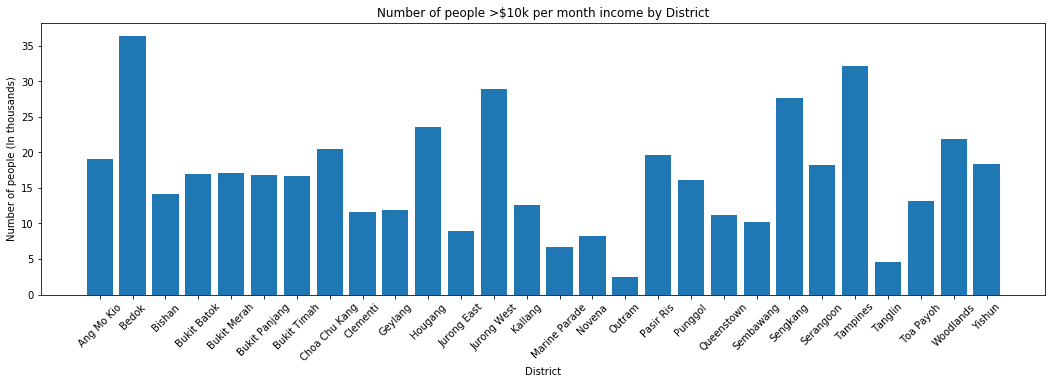

In [29]:
census_df

#plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

f, ax = plt.pyplot.subplots(figsize=(18,5))
plt.pyplot.bar(census_df['District'], census_df['High Income Earners (Thousands)'])

plt.pyplot.xlabel("District")
plt.pyplot.xticks(rotation=45)

plt.pyplot.ylabel("Number of people (In thousands)")
plt.pyplot.title("Number of people >$10k per month income by District")

#### Districts plotted on the map

In [30]:
import folium

# Try to plot all districts in Folium Map
latitude = 1.364717
longitude = 103.806706
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area, subpopln in zip(census_df['latitude'], census_df['longitude'], census_df['District'], census_df['High Income Earners (Thousands)']):
    label = '{}, {}'.format(area, subpopln)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

#### Screenshot of map (in case the map plot is not visible due to untrusted notebook issue)

<img src="https://raw.githubusercontent.com/teoweilung/BattleOfNeighborhoods/master/District_Singapore.png">

#### Important info for Foursquare API 

In [31]:
CLIENT_ID = 'HX1MKW4ZU5U5CT3QBCVWF53S22RWLSL5ASRUAVP2DWHYMEL4'
CLIENT_SECRET = 'MVQD01OKCHT5S3VWO1NGGKF4KVHR3DQDTNSFAIHJ2NI2CGED'
VERSION = '20180605'

#### Define function to call Foursquare API (nearby food venues from district centre)

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Just calling the function defined above

In [33]:
# type your answer here
LIMIT = 100
singapore_venues = getNearbyVenues(names=census_df['District'],
                                   latitudes=census_df['latitude'],
                                   longitudes=census_df['longitude']
                                  )

In [34]:
print(singapore_venues.shape)
singapore_venues.head()

(773, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.37,103.85,Old Chang Kee,1.369094,103.848389,Snack Place
1,Ang Mo Kio,1.37,103.85,MOS Burger,1.369170,103.847831,Burger Joint
2,Ang Mo Kio,1.37,103.85,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
3,Ang Mo Kio,1.37,103.85,A&W,1.369541,103.849043,Fast Food Restaurant
4,Ang Mo Kio,1.37,103.85,Pepper Lunch,1.369107,103.847791,Japanese Restaurant


#### 76 unique categories returned in total in Foursquare. We want to target districts where the most frequented venue is Japanese Restaurants

In [35]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))


There are 76 uniques categories.


#### Do one hot encoding so that we are able to later aggregate venues together grouped by district to determine frequency of each food venue type

In [36]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add District column back to dataframe
singapore_onehot['District'] = singapore_venues['District'] 

# move District column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()
singapore_onehot.shape

(773, 77)

In [37]:
singapore_grouped = singapore_onehot.groupby('District').mean().reset_index()

pd.options.display.max_columns = None
singapore_grouped.head()

,District,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Macanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Noodle House,Pizza Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shaanxi Restaurant,Snack Place,Soup Place,South Indian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Ang Mo Kio,0.0,0.026316,0.052632,0.0,0.0,0.000000,0.0,0.026316,0.0,0.052632,0.0,0.026316,0.000000,0.000000,0.026316,0.0,0.0,0.0,0.026316,0.0,0.0,0.000000,0.026316,0.0,0.000000,0.105263,0.0,0.0,0.0,0.131579,0.0,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.078947,0.0,0.0,0.026316,0.0,0.0,0.026316,0.052632,0.026316,0.0,0.026316,0.0,0.0,0.052632,0.0,0.026316,0.000000,0.052632,0.0,0.0,0.0,0.0,0.078947,0.0,0.0,0.000000,0.0,0.026316,0.0,0.000000
1,Bedok,0.0,0.111111,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.000000,0.0,0.000000,0.0,0.222222,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111
2,Bishan,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0.038462,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.115385,0.0,0.0,0.0,0.192308,0.0,0.0,0.000000,0.000000,0.0,0.038462,0.000000,0.0,0.0,0.0,0.192308,0.0,0.0,0.038462,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.038462,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.000000,0.038462,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.038462,0.038462,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.000000
3,Bukit Batok,0.0,0.000000,0.045455,0.0,0.0,0.045455,0.0,0.136364,0.0,0.000000,0.0,0.000000,0.000000,0.045455,0.090909,0.0,0.0,0.0,0.181818,0.0,0.0,0.045455,0.000000,0.0,0.000000,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.045455,0.0,0.045455,0.0,0.000000,0.0,0.0,0.045455,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,0.0,0.000000,0.0,0.000000
4,Bukit Merah,0.0,0.000000,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.400000,0.0,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


#### Listing of popular food venues by district

In [40]:
num_top_venues = 5

for district in singapore_grouped['District']:
    print("----"+district+"----")
    
    # for each neighbourhood...
    temp = singapore_grouped[singapore_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                  venue  freq
0            Food Court  0.13
1  Fast Food Restaurant  0.11
2   Japanese Restaurant  0.08
3      Sushi Restaurant  0.08
4      Asian Restaurant  0.05


----Bedok----
                  venue  freq
0   Japanese Restaurant  0.22
1           Wings Joint  0.11
2         Burrito Place  0.11
3   American Restaurant  0.11
4  Fast Food Restaurant  0.11


----Bishan----
                 venue  freq
0           Food Court  0.19
1   Chinese Restaurant  0.19
2                 Café  0.12
3     Asian Restaurant  0.08
4  Japanese Restaurant  0.08


----Bukit Batok----
                  venue  freq
0    Chinese Restaurant  0.18
1                Bakery  0.14
2            Food Court  0.09
3  Fast Food Restaurant  0.09
4                  Café  0.09


----Bukit Merah----
                venue  freq
0      Breakfast Spot   0.4
1    Asian Restaurant   0.2
2          Food Court   0.2
3           Cafeteria   0.2
4  African Restaurant   0.0


----Bukit Panjang---

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
np.arange(num_top_venues)

array([0, 1, 2, 3, 4])

#### Create a new dataframe of districts together with top 10 most common food venues

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = singapore_grouped['District']

for ind in np.arange(singapore_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Food Court,Fast Food Restaurant,Sushi Restaurant,Japanese Restaurant,Asian Restaurant,Snack Place,Sandwich Place,Breakfast Spot,Noodle House,Ramen Restaurant
1,Bedok,Japanese Restaurant,Wings Joint,Burrito Place,American Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Fast Food Restaurant,Café,Diner,Donut Shop
2,Bishan,Chinese Restaurant,Food Court,Café,Asian Restaurant,Japanese Restaurant,Shaanxi Restaurant,Noodle House,Dumpling Restaurant,Italian Restaurant,Fried Chicken Joint
3,Bukit Batok,Chinese Restaurant,Bakery,Food Court,Fast Food Restaurant,Café,Cafeteria,Italian Restaurant,Dim Sum Restaurant,Indian Restaurant,Sandwich Place
4,Bukit Merah,Breakfast Spot,Asian Restaurant,Cafeteria,Food Court,Food,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant


#### Start to do K means clustering Machine Learning on the data we have above. we decide on K = 5

In [44]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

# set number of clusters
kclusters = 5

singapore_grouped_clustering = singapore_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 2, 2, 2, 3, 2, 4, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2], dtype=int32)

In [45]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

singapore_merged = census_df

singapore_merged = pd.merge(singapore_merged, district_venues_sorted.set_index('District'), on='District')

singapore_merged.head()

,District,latitude,longitude,High Income Earners (Thousands),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,1.37,103.85,19.1,0,Food Court,Fast Food Restaurant,Sushi Restaurant,Japanese Restaurant,Asian Restaurant,Snack Place,Sandwich Place,Breakfast Spot,Noodle House,Ramen Restaurant
1,Bedok,1.32,103.93,36.4,2,Japanese Restaurant,Wings Joint,Burrito Place,American Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Fast Food Restaurant,Café,Diner,Donut Shop
2,Bishan,1.35,103.85,14.2,2,Chinese Restaurant,Food Court,Café,Asian Restaurant,Japanese Restaurant,Shaanxi Restaurant,Noodle House,Dumpling Restaurant,Italian Restaurant,Fried Chicken Joint
3,Bukit Batok,1.35,103.75,16.9,2,Chinese Restaurant,Bakery,Food Court,Fast Food Restaurant,Café,Cafeteria,Italian Restaurant,Dim Sum Restaurant,Indian Restaurant,Sandwich Place
4,Bukit Merah,1.27,103.83,17.1,3,Breakfast Spot,Asian Restaurant,Cafeteria,Food Court,Food,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant


#### Now we have the clusters as well as number of high income earners for each of the districts in each of the cluster

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['latitude'], singapore_merged['longitude'], singapore_merged['District'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Screenshot of map (in case the map plot is not visible due to untrusted notebook issue)

<img src='https://raw.githubusercontent.com/teoweilung/BattleOfNeighborhoods/master/Clustered_Singapore.png'>

In [47]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,19.1,Food Court,Fast Food Restaurant,Sushi Restaurant,Japanese Restaurant,Asian Restaurant,Snack Place,Sandwich Place,Breakfast Spot,Noodle House,Ramen Restaurant
9,Geylang,11.9,Asian Restaurant,Bakery,Food Court,Fast Food Restaurant,Noodle House,Vegetarian / Vegan Restaurant,Chinese Restaurant,Ramen Restaurant,Halal Restaurant,Steakhouse
10,Hougang,23.6,Fast Food Restaurant,Food Court,Snack Place,Chinese Restaurant,Bakery,Café,Vegetarian / Vegan Restaurant,Asian Restaurant,BBQ Joint,Soup Place
13,Kallang,12.6,Food Court,Snack Place,Japanese Restaurant,Café,BBQ Joint,Indian Restaurant,Noodle House,Fast Food Restaurant,Wings Joint,Dim Sum Restaurant
17,Pasir Ris,19.6,Food Court,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Café,Bakery,Dim Sum Restaurant,Cafeteria
20,Sembawang,10.2,Food Court,Bakery,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Asian Restaurant,Japanese Restaurant,Korean Restaurant,Wings Joint,Bistro
21,Sengkang,27.6,Sushi Restaurant,Indonesian Restaurant,Food Court,Fast Food Restaurant,Wings Joint,Filipino Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop
26,Woodlands,21.9,Food Court,Asian Restaurant,Food Truck,Snack Place,Noodle House,Thai Restaurant,Pizza Place,Dim Sum Restaurant,Bakery,Food


In [48]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Marine Parade,6.7,Café,Seafood Restaurant,Bakery,Fast Food Restaurant,Wings Joint,Filipino Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant


In [49]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bedok,36.4,Japanese Restaurant,Wings Joint,Burrito Place,American Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Fast Food Restaurant,Café,Diner,Donut Shop
2,Bishan,14.2,Chinese Restaurant,Food Court,Café,Asian Restaurant,Japanese Restaurant,Shaanxi Restaurant,Noodle House,Dumpling Restaurant,Italian Restaurant,Fried Chicken Joint
3,Bukit Batok,16.9,Chinese Restaurant,Bakery,Food Court,Fast Food Restaurant,Café,Cafeteria,Italian Restaurant,Dim Sum Restaurant,Indian Restaurant,Sandwich Place
5,Bukit Panjang,16.8,Chinese Restaurant,Japanese Restaurant,Bakery,Sushi Restaurant,Café,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Indonesian Restaurant,Indian Restaurant
7,Choa Chu Kang,20.5,Café,Asian Restaurant,Food Court,Bakery,Vegetarian / Vegan Restaurant,Chinese Restaurant,Noodle House,BBQ Joint,Japanese Restaurant,Restaurant
8,Clementi,11.6,Bakery,Café,Chinese Restaurant,Seafood Restaurant,Food Court,Dim Sum Restaurant,Malay Restaurant,BBQ Joint,Steakhouse,Indian Restaurant
11,Jurong East,9.0,Café,Japanese Restaurant,Food Court,Fast Food Restaurant,Steakhouse,Bakery,Thai Restaurant,Seafood Restaurant,Chinese Restaurant,Bistro
12,Jurong West,28.9,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant,Korean Restaurant,Wings Joint,Seafood Restaurant,Indian Restaurant,Japanese Curry Restaurant
15,Novena,8.2,Japanese Restaurant,Café,Asian Restaurant,Ramen Restaurant,Thai Restaurant,Hotpot Restaurant,Hainan Restaurant,Bakery,Noodle House,Italian Restaurant
16,Outram,2.4,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Korean Restaurant,Café,Japanese Restaurant,French Restaurant,Restaurant,Burger Joint,Modern European Restaurant


In [50]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bukit Merah,17.1,Breakfast Spot,Asian Restaurant,Cafeteria,Food Court,Food,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant


In [51]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Bukit Timah,16.6,Halal Restaurant,Asian Restaurant,Chinese Restaurant,American Restaurant,Food,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant


#### From the above clusters, it is obvious that Cluster 2 (Light Blue) has got the highest preference for Japanese cuisine, especially the districts Serangoon, Jurong West and Bedok, Punggol, Novena. So it is fairly safe to conclude that the new shop should be set up somewhere in Cluster 2. Let us now sort the Cluster 2 Districts by number of high income earners to decide the best district within the cluster to set up shop

In [52]:
final_analysis_df = singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[0] + [3] + list(range(5, singapore_merged.shape[1]))]]
final_analysis_df = final_analysis_df.sort_values(by='High Income Earners (Thousands)', ascending=False)
final_analysis_df[final_analysis_df['1st Most Common Venue'] == 'Japanese Restaurant']

,District,High Income Earners (Thousands),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bedok,36.4,Japanese Restaurant,Wings Joint,Burrito Place,American Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Fast Food Restaurant,Café,Diner,Donut Shop
12,Jurong West,28.9,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant,Korean Restaurant,Wings Joint,Seafood Restaurant,Indian Restaurant,Japanese Curry Restaurant
22,Serangoon,18.2,Japanese Restaurant,Café,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Sushi Restaurant,Bakery,Steakhouse,Diner
18,Punggol,16.1,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Café,Sushi Restaurant,Soup Place,Buffet,Burger Joint,Food Stand,Korean Restaurant
15,Novena,8.2,Japanese Restaurant,Café,Asian Restaurant,Ramen Restaurant,Thai Restaurant,Hotpot Restaurant,Hainan Restaurant,Bakery,Noodle House,Italian Restaurant


### Conclusion
#### The winner is Bedok. Jurong West is a strong runner-up to set up a Japanese restaurant as well. Other important factors that were not examined in this exercise that can influence decision of location selection is the relative space rental costs as well as presence of competitors at each identified districts.